# Capstone Project - Fang Hong


# Title of Project: Rossmann Store Sales
Kaggle link: https://www.kaggle.com/c/rossmann-store-sales

## Descriptive of the Project:
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! 

## Aims of the Project:
- EDA: explore the relationship among different features
- Test models with different features
- Test model fits with different features and find out which models are good

## Steps to take:
- Step 1: Import the data and examine the descriptives of variables of interest; broadly examime the relationship between sales and features.
- Step 2: Run linear regression model to predict sales. -- Use Train_test split and K-folds cross-valication
- Step 3: Run linear regression model to predict sales. -- Use decision tree
- Step 4: Make the submission folder and submit to website to get accuracy score.

### Step 1: Import the data and examine the descriptives of variables of interest; broadly examime the relationship between sales and features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from datetime import datetime as dt
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


In [3]:
# import three dataframe: test, train, store
test=pd.read_csv('test.csv')
test.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [4]:
train=pd.read_csv('train.csv')
train.head(5)

/Users/fanghong/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
store=pd.read_csv('store.csv')
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [8]:
train.dropna()
store.dropna()
test.dropna()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


-- Since train and Store both have the key value store (store number); let's merge them today to have a dataframe that have all features

In [9]:
train_store=pd.merge(train, store, on='Store')
train_store.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


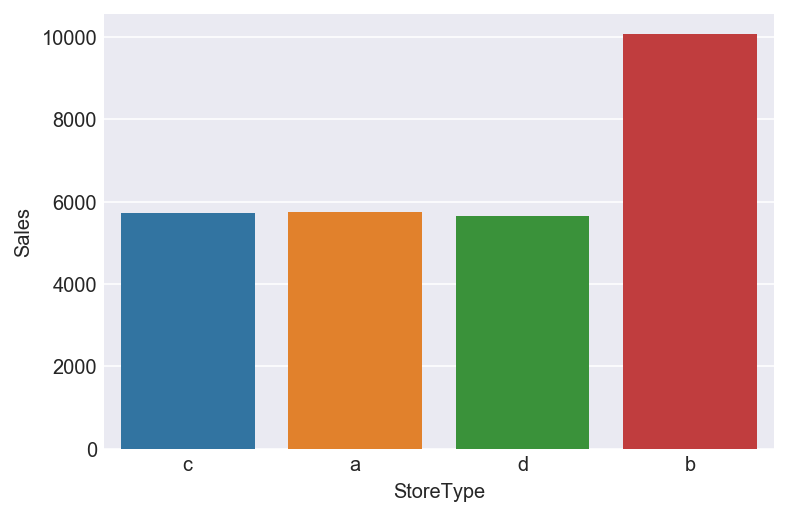

In [52]:
# Descripative of each store types
#train_store.groupby('StoreType').Sales.mean()
sns.barplot(data=train_store, x='StoreType', y='Sales', ci=None)

-- Store type b has the highest mean sales. Thus, StoreType mighe be a good figure to predict sales.

In [11]:
# Examine the whether the sales affected by assorment for each types of store.
train_store.groupby(['StoreType', 'Assortment']).Sales.mean()

StoreType  Assortment
a          a              5398.858310
           c              6310.867032
b          a             10821.619806
           b              8553.931999
           c             17969.556263
c          a              5647.174314
           c              5805.782193
d          a              5317.885943
           c              5826.407660
Name: Sales, dtype: float64

-- Sales differ with different types of assortment. Assortment might also be a good feature.

In [12]:
# Examine the whether Day of Week impact sales for each types of score.
examine2=train_store.groupby(['StoreType', 'DayOfWeek']).Sales.mean()
#examine2.plot(kind='bar', figsize=(10, 8), ))

It seems people shoped less (sales is lower) on day 6 and day 7 thank other days of week. Day of Week should be a good feature.

In [13]:
# Examine whether the SchoolHoliday (school closed during this holiday) affects sales
train_store.groupby(['StoreType', 'SchoolHoliday']).Sales.mean()

StoreType  SchoolHoliday
a          0                 5566.874552
           1                 6527.078496
b          0                10071.792396
           1                10001.463649
c          0                 5571.810326
           1                 6414.502941
d          0                 5514.277300
           1                 6230.282334
Name: Sales, dtype: float64

-- school holiday increase sales of store type a, c, d, but decrease sales of store type b.

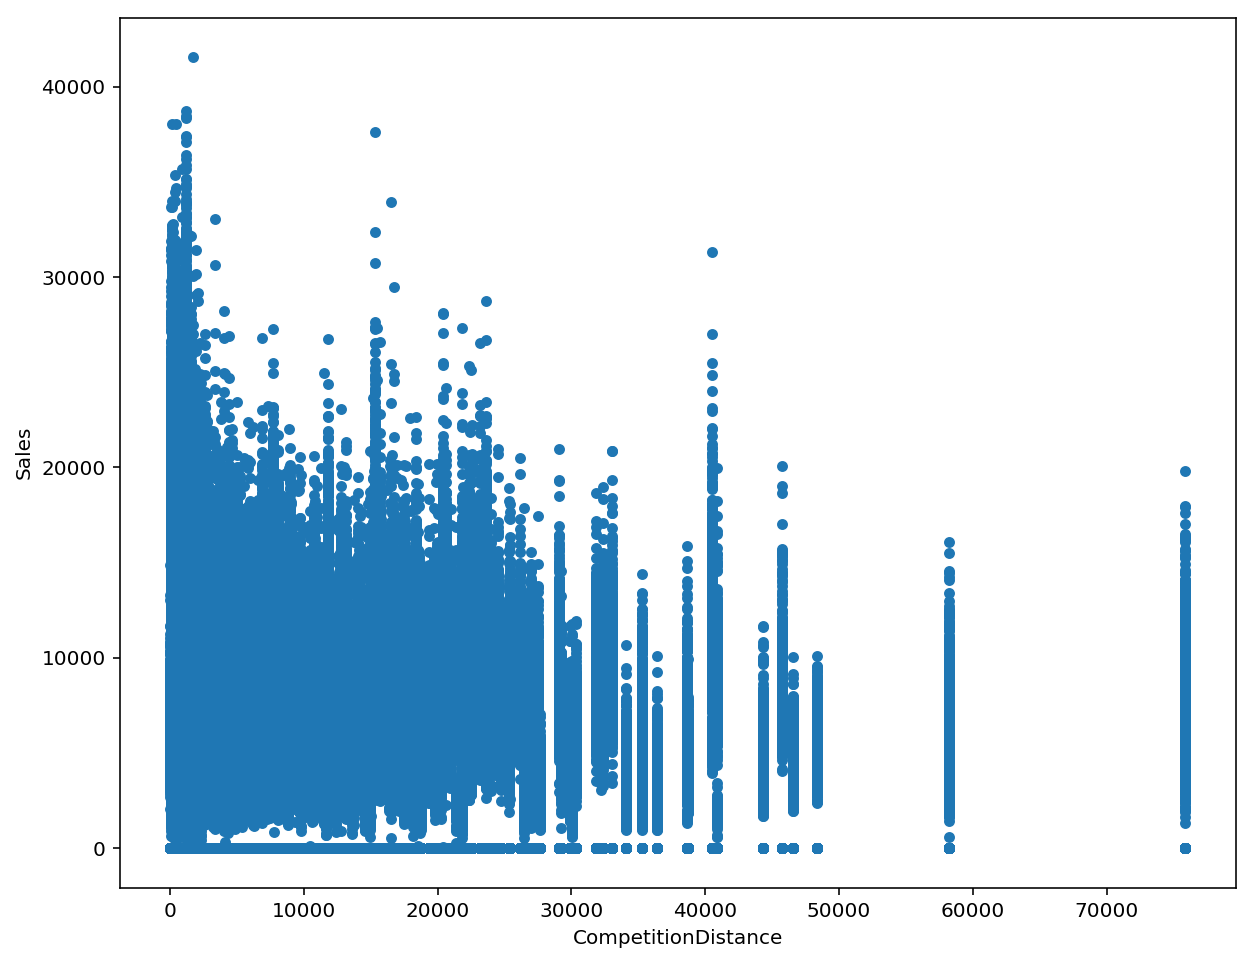

In [32]:
# Examine the association between sales and CompetitionDistance
train_store.plot.scatter(x='CompetitionDistance', y='Sales', legend=True, figsize=(10, 8))

--It seems the relationship is not very clear. Generally, the smaller the distance, the higher the sale. Probably because the more the stores, the more likely the locations is good and have more people/visitors.

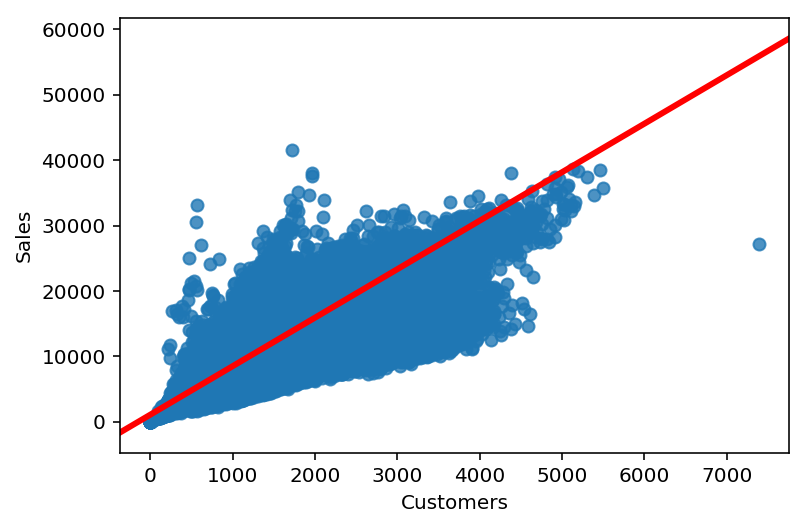

In [35]:
# Examine the association between number of customers and sales
#train_store.plot.scatter(x='Customers', y='Sales', legend=True, figsize=(10, 8))

sns.regplot('Customers','Sales', data = train_store, line_kws={"color":"r", "lw":3})


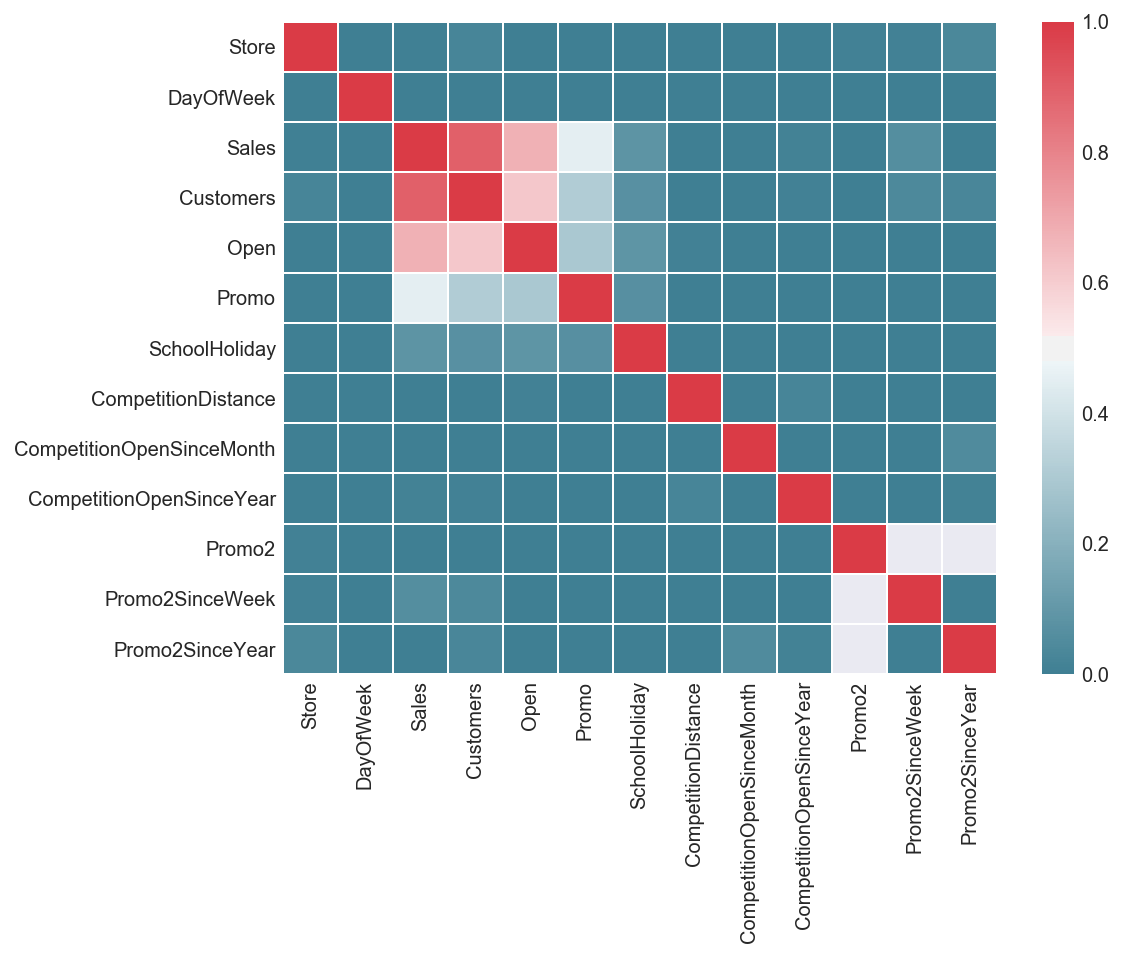

In [68]:
# Examine the correlation among different features.
plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_store.corr(), vmin=0, vmax=1, cmap=cmap, linewidths=.5)

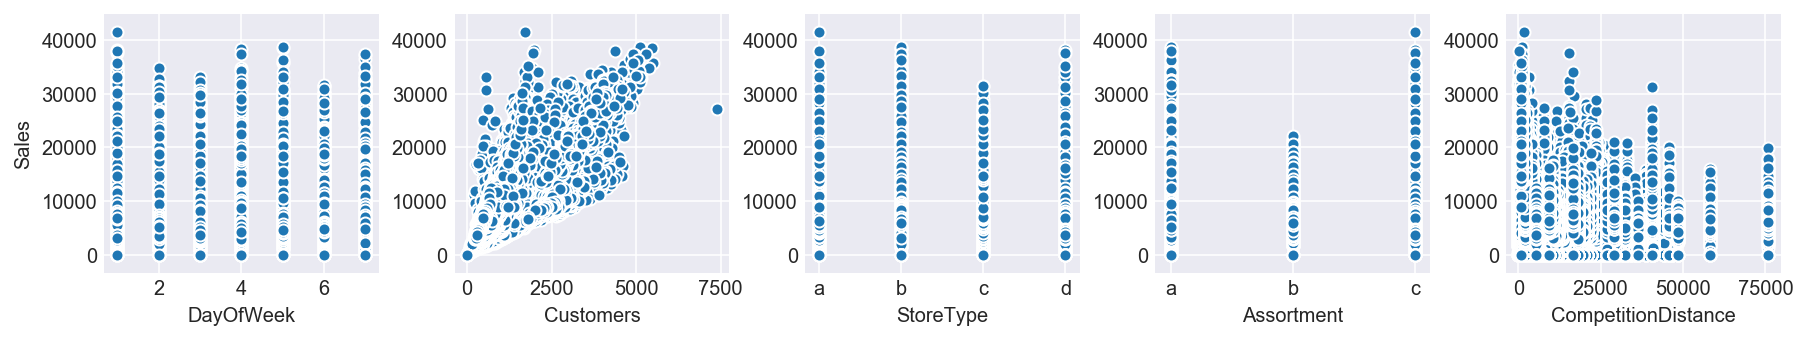

In [49]:
#Multiple scatterplots in Seaborn
sns.set_style('darkgrid')
feature_cols1=['DayOfWeek', 'Customers', 'StoreType', 'Assortment', 'CompetitionDistance']
sns.pairplot(train_store, x_vars=feature_cols1, y_vars='Sales', kind='scatter', palette="Set2")

-- A very clear relationship: the larger the number of customers, the higher the sales.

In general, possible good features include StoreType (categorical), Assortment(categorical), DayofWeek(categorical), SchoolHoliday(categorical), customers.

### Step 2: Run linear regression model to predict sales. -- Use Train_test split and K-Folds cross-valication

In [17]:
# Merge the test and store dataframe
test_store=pd.merge(test, store, on='Store')
test_store.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### Convert all categorical features.

In [18]:
# convert categorical variables (StoreType) to multiple dummy codetrain
train_store_type1=pd.get_dummies(train_store.StoreType, prefix='StoreType')

# drop the first column
train_store_type1.drop(train_store_type1.columns[0], axis=1, inplace=True)

# concatenate the orginal train_store dataframe and the dummy dataframe
train_store1=pd.concat([train_store, train_store_type1], axis=1)

In [19]:
# convert categorical variables (Assortment) to multiple dummy codetrain
train_store_assortment=pd.get_dummies(train_store.Assortment, prefix='Assortment')

# drop the first column
train_store_assortment.drop(train_store_assortment.columns[0], axis=1, inplace=True)

# concatenate the orginal train_store dataframe and the dummy dataframe
train_store2=pd.concat([train_store1, train_store_assortment], axis=1)

In [20]:
# convert categorical variables (DayOfWeek) to multiple dummy codetrain
train_store_dayofweek=pd.get_dummies(train_store.DayOfWeek, prefix='DayOfWeek')

# drop the first column
train_store_dayofweek.drop(train_store_dayofweek.columns[0], axis=1, inplace=True)

# concatenate the orginal train_store dataframe and the dummy dataframe
train_store3=pd.concat([train_store2, train_store_dayofweek], axis=1)

In [21]:
# convert categorical variables (SchoolHoliday) to multiple dummy codetrain
train_store_SchoolHoliday=pd.get_dummies(train_store.SchoolHoliday, prefix='SchoolHoliday')

# drop the first column
train_store_SchoolHoliday.drop(train_store_SchoolHoliday.columns[0], axis=1, inplace=True)

# concatenate the orginal train_store dataframe and the dummy dataframe
train_store4=pd.concat([train_store3, train_store_dayofweek], axis=1)
train_store4.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,1,0,0,0,0,0,1,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1,0,0,0,0,0,1,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,0,0,0,0,0,1,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,0,0,0,1,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_store4.columns

Index([u'Store', u'DayOfWeek', u'Date', u'Sales', u'Customers', u'Open',
       u'Promo', u'StateHoliday', u'SchoolHoliday', u'StoreType',
       u'Assortment', u'CompetitionDistance', u'CompetitionOpenSinceMonth',
       u'CompetitionOpenSinceYear', u'Promo2', u'Promo2SinceWeek',
       u'Promo2SinceYear', u'PromoInterval', u'StoreType_b', u'StoreType_c',
       u'StoreType_d', u'Assortment_b', u'Assortment_c', u'DayOfWeek_2',
       u'DayOfWeek_3', u'DayOfWeek_4', u'DayOfWeek_5', u'DayOfWeek_6',
       u'DayOfWeek_7', u'DayOfWeek_2', u'DayOfWeek_3', u'DayOfWeek_4',
       u'DayOfWeek_5', u'DayOfWeek_6', u'DayOfWeek_7'],
      dtype='object')

### Run mutiple linear regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


# Run the linear regression with dummy variables included
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

feature_cols=['CompetitionDistance', 'StoreType_b', u'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c', 'DayOfWeek_2', 'DayOfWeek_3', u'DayOfWeek_4', u'DayOfWeek_5', u'DayOfWeek_6', 'DayOfWeek_7', u'DayOfWeek_2', u'DayOfWeek_3', u'DayOfWeek_4', 'DayOfWeek_5', u'DayOfWeek_6', u'DayOfWeek_7']
x=train_store4[feature_cols]
y=train_store4.Sales

lr.fit(x, y)
list(zip(feature_cols, lr.coef_))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').